In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def GBM_model(S0, K, Sigma, T, r, M=1):
    # drift coefficent
    mu = 0.1
    # number of steps
    n = 100
    # M --> number of sims

    # calc each time step
    dt = T/n
    # simulation using numpy arrays
    St = np.exp(
        (mu - Sigma ** 2 / 2) * dt
        + Sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
    )
    # include array of 1's
    St = np.vstack([np.ones(M), St])
    # multiply through by S0 and return the cumulative product of elements along a given simulation path axis=0. 
    St = S0 * St.cumprod(axis=0)

    # Define time interval correctly 
    time = np.linspace(0,T,n+1)
    # Require numpy array that is the same shape as St
    tt = np.full(shape=(M,n+1), fill_value=time).T
    plt.plot(tt, St)
    plt.xlabel("Years (t)")
    plt.ylabel("Stock Price (St)")
    plt.title(
        "Realizations of Geometric Brownian Motion\n dSt=μStdt+σStdWt\n S0={},μ={},σ={}".format(S0, mu, Sigma)
    )
    plt.show

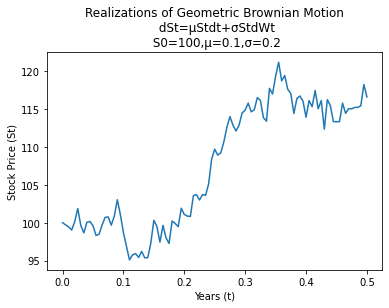

In [ ]:
GBM_model(100,103,0.2,0.5,0.03)

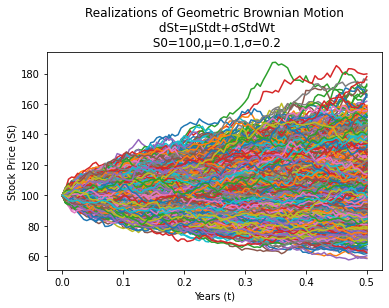

In [ ]:
GBM_model(100,103,0.2,0.5,0.03, 10000)

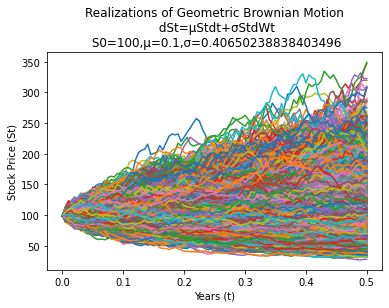

In [ ]:
sampl = np.random.uniform(low=0.1, high=0.5, size=(100,))

for i in range(len(sampl)):
  GBM_model(100,103,sampl[i],0.5,0.03,1000)

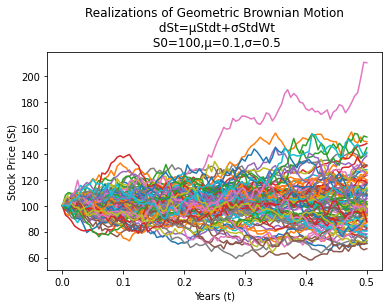

In [ ]:
space = np.linspace(0.1,0.5,100)
for i in range(len(space)):
  GBM_model(100,103,space[i],0.5,0.03)

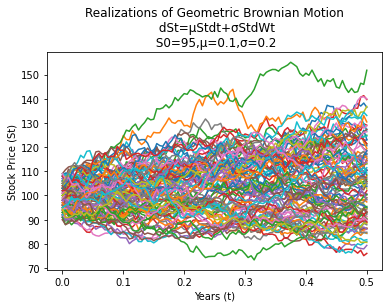

In [ ]:
S0_list = np.random.randint(90,110,100)
for i in range(len(S0_list)):
  GBM_model(S0_list[i],103,0.2,0.5,0.03)